In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

In [2]:
# Assigment 1

data = pd.read_csv('ds-boot-1.csv', delimiter='\t')
del data['id']
labels = ['y1', 'y2', 'y3', 'y4', 'y5']

In [3]:
data.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,6.48148,3.0,5.0,7.75000,0.00000,7.16667,8.16667,9.66667,6.16667,9.0,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,5.74074,4.0,8.0,7.33333,8.00000,8.83333,9.75000,9.66667,9.00000,10.0,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,7.59259,7.0,8.0,7.66667,8.00000,9.66667,9.50000,6.16667,9.66667,6.5,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,5.96297,4.0,8.0,9.33333,10.00000,9.33333,7.00000,8.50000,9.66667,6.5,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,5.44444,1.0,3.5,6.41667,9.00000,8.50000,7.08333,6.33333,9.00000,7.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67
5,9.62963,10.0,8.0,7.00000,6.66667,9.00000,8.41667,7.00000,0.00000,0.0,...,0.00000,0.00000,0.0,8.00000,0.0,4.0,6.25,8.04,1.27,6.00
6,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00,0.00,0.00,0.00
7,7.07408,4.0,6.0,5.75000,7.66667,6.33333,5.33333,3.33333,8.00000,4.0,...,9.00000,10.00000,8.0,10.00000,10.0,2.0,3.00,6.30,2.00,3.99
8,9.25926,0.0,7.5,9.75000,7.00000,9.50000,7.08333,3.66667,7.33333,7.5,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,7.00,8.03,1.45,6.27
9,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00,0.00,0.00,0.00


In [4]:
np.mean(data['y1'])

4.025

In [5]:
B = 1000
N = data['p1'].size 

def bootstrap(stat):
    for label in labels:
        s = stat(data[label])
        bootstrap = np.zeros((B, N))
        for b in range(B):
            bootstrap[b] = np.random.choice(data[label], size=N)
        stats = [stat(sample) for sample in bootstrap.T]
        err = np.sqrt( sum([(ss - s)**2 for ss in stats]) ) / np.sqrt(B)
        print(label, '\t sample stat: ', s, '\t bootstrap stat: ', np.mean(stats), '\t err: ', err)
        
print('\nMean')
bootstrap(np.mean)
print('\nMedian')
bootstrap(np.median)


Mean
y1 	 sample stat:  4.025 	 bootstrap stat:  4.001625 	 err:  0.01356943256
y2 	 sample stat:  5.50625 	 bootstrap stat:  5.49825 	 err:  0.0206450569144
y3 	 sample stat:  7.306000000000002 	 bootstrap stat:  7.30653075 	 err:  0.0166917526671
y4 	 sample stat:  1.5275 	 bootstrap stat:  1.534445 	 err:  0.00432530604698
y5 	 sample stat:  5.63475 	 bootstrap stat:  5.6327905 	 err:  0.0151247627089

Median
y1 	 sample stat:  4.0 	 bootstrap stat:  4.0 	 err:  0.0
y2 	 sample stat:  6.25 	 bootstrap stat:  6.271875 	 err:  0.0181142209327
y3 	 sample stat:  8.215 	 bootstrap stat:  8.221375 	 err:  0.0189202272714
y4 	 sample stat:  1.865 	 bootstrap stat:  1.87175 	 err:  0.009
y5 	 sample stat:  6.225 	 bootstrap stat:  6.21525 	 err:  0.00754652237789


In [6]:
# label = 'y1'
# features = [name for name in data.columns if name not in labels]
# lr = LinearRegression()


In [9]:

# Assignment 2

data2 = pd.read_csv('ds-boot-2.csv', delimiter='\t')

In [14]:
data2.head()

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4


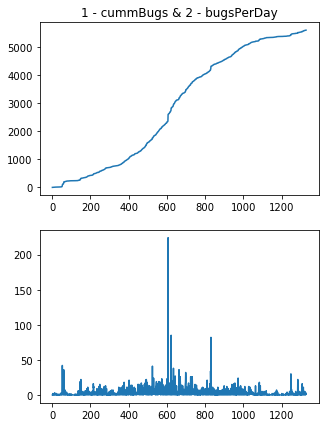

In [27]:
plt.figure(figsize=(5,7))
plt.subplot(2, 1, 1)
plt.title('1 - cummBugs & 2 - bugsPerDay')
plt.plot(data2['day'], data2['cummBugs'])
plt.subplot(2, 1, 2)
plt.plot(data2['day'], data2['bugsPerDay'])
plt.show()

In [140]:
N = data2['day'].count()
A = 6000
def sshape(x, b, a = A):
    return a * (1 - (1+b*x) * np.e**(-b*x))

def err(b, a=5000):
    return 1/N * sum( [(data2['cummBugs'][i] - sshape(data2['day'][i], b))**2 for i in range(N)] )

def grad_b_sshape(b, a = A):
    x = data2['day']
    y = data2['cummBugs']
    e = np.e
    return 1/N * sum( [ 2*(y[i] - sshape(x[i], b, a)) * a * e**(-b*x[i]) * (b*x[i]**2 - 2*x[i]) for i in range(N)] )

b_0 = 0.
res = minimize(err, b_0, method='nelder-mead')

b_star = res.x[0]
print(res)

 final_simplex: (array([[ 0.0027073 ],
       [ 0.00270731]]), array([ 192724.3628816 ,  192724.36288305]))
           fun: 192724.36288160383
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([ 0.0027073])


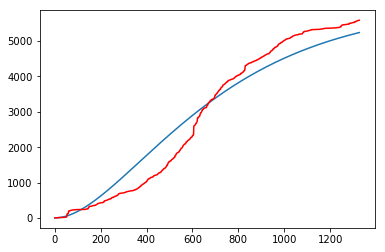

In [141]:
x = data2['day']
y = [sshape(val, b_star) for val in x]
plt.plot(x, y)
plt.plot(data2['day'], data2['cummBugs'], 'r')
plt.show()

# Red line - original data, blue line - fitted s-shaped model

In [149]:
# Bootstraping

B = 100 # 1000 takes too long time
bootstrap = np.zeros((B, N))
cumm = data2['cummBugs']
bs = np.zeros(B)

for b in range(B):
    days = np.sort( np.random.choice(data2['day'], size=N) )
    bootstrap[b] = [cumm[day - 1] for day in days]
    res = minimize(err, b_0, method='nelder-mead')
    bs[b] = res.x[0]
    
# mean value from bootstrap
b_hat = bs.mean()

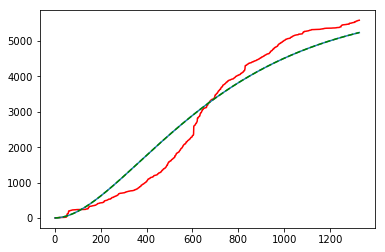

In [150]:
plt.plot(data2['day'], data2['cummBugs'], 'r')
x = data2['day']
y = [sshape(val, b_star) for val in x]
plt.plot(x, y)
x = data2['day']
y_hat = [sshape(val, b_hat) for val in x]
plt.plot(x, y_hat, 'g--')
plt.show()

# Green dashed line is the bootstraped s-shaped model, the blue line (under green) is original model